In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn import datasets, svm

/home/krisha/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [15]:
df = pd.read_excel("AirQualityUCI.xlsx", na_values=-200)
df = df.drop(df.index[0:6])
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
6,2004-03-11,00:00:00,1.2,1185.000000,31,3.624399,689.500000,62.0,1461.750000,77.0,1332.750000,732.500000,11.325000,56.775000,0.760312
7,2004-03-11,01:00:00,1.0,1136.250000,31,3.326677,672.000000,62.0,1453.250000,76.0,1332.750000,729.500000,10.675000,60.000000,0.770238
8,2004-03-11,02:00:00,0.9,1094.000000,24,2.339416,608.500000,45.0,1579.000000,60.0,1276.000000,619.500000,10.650000,59.674999,0.764819
9,2004-03-11,03:00:00,0.6,1009.750000,19,1.696658,560.750000,NaN,1705.000000,NaN,1234.750000,501.250000,10.250000,60.200001,0.751657
10,2004-03-11,04:00:00,NaN,1011.000000,14,1.293620,526.750000,21.0,1817.500000,34.0,1196.750000,445.250000,10.075000,60.474999,0.746495
11,2004-03-11,05:00:00,0.7,1066.000000,8,1.133431,512.000000,16.0,1918.000000,28.0,1182.000000,421.750000,11.000000,56.175000,0.736560
12,2004-03-11,06:00:00,0.7,1051.750000,16,1.603768,553.250000,34.0,1738.250000,48.0,1221.250000,471.500000,10.450000,58.125000,0.735295
13,2004-03-11,07:00:00,1.1,1144.000000,29,3.243618,667.000000,98.0,1489.750000,82.0,1339.000000,729.750000,10.200000,59.599999,0.741736
14,2004-03-11,08:00:00,2.0,1333.250000,64,8.013773,899.750000,174.0,1136.000000,112.0,1517.000000,1101.500000,10.750000,57.425000,0.740795
15,2004-03-11,09:00:00,2.2,1351.000000,87,9.540643,960.250000,129.0,1079.000000,101.0,1582.750000,1027.750000,10.500000,60.599998,0.769111


In [16]:
df.isnull().values.any()
#df.isnull().sum().sum() Above method is faster


True

In [18]:
df=df.rename(columns = {'CO(GT)':'CO','PT08.S1(CO)':'PT08CO','NMHC(GT)':'NHMC','C6H6(GT)':'C6H6','PT08.S2(NMHC)':'PT08NMHC','NOx(GT)':'NOx','PT08.S3(NOx)':'PT08NOx','NO2(GT)':'NO2','PT08.S4(NO2)':'PT08NO2','PT08.S5(O3)':'PT08O3'})

In [19]:
df

,Date,Time,CO,PT08CO,NHMC,C6H6,PT08NMHC,NOx,PT08NOx,NO2,PT08NO2,PT08O3,T,RH,AH
6,2004-03-11,00:00:00,1.2,1185.000000,31,3.624399,689.500000,62.0,1461.750000,77.0,1332.750000,732.500000,11.325000,56.775000,0.760312
7,2004-03-11,01:00:00,1.0,1136.250000,31,3.326677,672.000000,62.0,1453.250000,76.0,1332.750000,729.500000,10.675000,60.000000,0.770238
8,2004-03-11,02:00:00,0.9,1094.000000,24,2.339416,608.500000,45.0,1579.000000,60.0,1276.000000,619.500000,10.650000,59.674999,0.764819
9,2004-03-11,03:00:00,0.6,1009.750000,19,1.696658,560.750000,NaN,1705.000000,NaN,1234.750000,501.250000,10.250000,60.200001,0.751657
10,2004-03-11,04:00:00,NaN,1011.000000,14,1.293620,526.750000,21.0,1817.500000,34.0,1196.750000,445.250000,10.075000,60.474999,0.746495
11,2004-03-11,05:00:00,0.7,1066.000000,8,1.133431,512.000000,16.0,1918.000000,28.0,1182.000000,421.750000,11.000000,56.175000,0.736560
12,2004-03-11,06:00:00,0.7,1051.750000,16,1.603768,553.250000,34.0,1738.250000,48.0,1221.250000,471.500000,10.450000,58.125000,0.735295
13,2004-03-11,07:00:00,1.1,1144.000000,29,3.243618,667.000000,98.0,1489.750000,82.0,1339.000000,729.750000,10.200000,59.599999,0.741736
14,2004-03-11,08:00:00,2.0,1333.250000,64,8.013773,899.750000,174.0,1136.000000,112.0,1517.000000,1101.500000,10.750000,57.425000,0.740795
15,2004-03-11,09:00:00,2.2,1351.000000,87,9.540643,960.250000,129.0,1079.000000,101.0,1582.750000,1027.750000,10.500000,60.599998,0.769111


In [20]:
max(df['T'])
#len(df.CO)


44.600000381469997

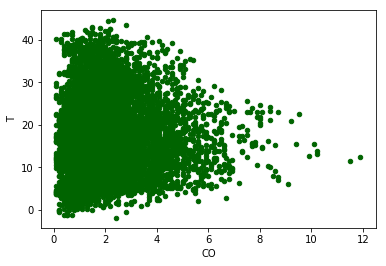

In [21]:
df.plot(kind='scatter', x='CO', y='T',color='DarkGreen');

In [22]:
df.corr()

,CO,PT08CO,NHMC,C6H6,PT08NMHC,NOx,PT08NOx,NO2,PT08NO2,PT08O3,T,RH,AH
CO,1.000000,0.879703,0.165168,0.931092,0.915513,0.795103,-0.703796,0.683543,0.630729,0.854214,0.022039,0.048977,0.048518
PT08CO,0.879703,1.000000,0.249770,0.884282,0.893347,0.714438,-0.773461,0.641980,0.682940,0.899528,0.049123,0.114456,0.135824
NHMC,0.165168,0.249770,1.000000,0.137088,0.134507,-0.108708,0.050833,-0.016569,0.213746,0.111414,-0.067398,-0.014652,-0.123078
C6H6,0.931092,0.884282,0.137088,1.000000,0.981966,0.718914,-0.735932,0.614775,0.765772,0.865788,0.198813,-0.061561,0.167853
PT08NMHC,0.915513,0.893347,0.134507,0.981966,1.000000,0.704521,-0.797036,0.646544,0.777261,0.880631,0.241315,-0.090292,0.186905
NOx,0.795103,0.714438,-0.108708,0.718914,0.704521,1.000000,-0.655664,0.763222,0.233910,0.787206,-0.270084,0.221219,-0.149565
PT08NOx,-0.703796,-0.773461,0.050833,-0.735932,-0.797036,-0.655664,1.000000,-0.652543,-0.538971,-0.797165,-0.144617,-0.057078,-0.231640
NO2,0.683543,0.641980,-0.016569,0.614775,0.646544,0.763222,-0.652543,1.000000,0.157685,0.708267,-0.186437,-0.091857,-0.334888
PT08NO2,0.630729,0.682940,0.213746,0.765772,0.777261,0.233910,-0.538971,0.157685,1.000000,0.591116,0.561565,-0.032216,0.629875
PT08O3,0.854214,0.899528,0.111414,0.865788,0.880631,0.787206,-0.797165,0.708267,0.591116,1.000000,-0.027115,0.124927,0.070827
